In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
a=!kaggle datasets download -d tharun369/dogs-vs-cats

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Load and preprocess the data
train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_set = train_data.flow_from_directory('/content/train',
                                          target_size=(224, 224),
                                          batch_size=32,
                                          class_mode='binary')

Found 8005 images belonging to 2 classes.


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set, epochs=15)


Epoch 1/15
251/251 [==============================] - 22s 65ms/step - loss: 5.7469 - accuracy: 0.5264
Epoch 2/15
251/251 [==============================] - 16s 65ms/step - loss: 2.2108 - accuracy: 0.5654
Epoch 3/15
251/251 [==============================] - 18s 71ms/step - loss: 2.3827 - accuracy: 0.5580
Epoch 4/15
251/251 [==============================] - 22s 90ms/step - loss: 1.2423 - accuracy: 0.5906
Epoch 5/15
251/251 [==============================] - 18s 70ms/step - loss: 1.1905 - accuracy: 0.5839
Epoch 6/15
251/251 [==============================] - 17s 69ms/step - loss: 0.8974 - accuracy: 0.6116
Epoch 7/15
251/251 [==============================] - 19s 74ms/step - loss: 0.8310 - accuracy: 0.6119
Epoch 8/15
251/251 [==============================] - 16s 65ms/step - loss: 0.6770 - accuracy: 0.6476
Epoch 9/15
251/251 [==============================] - 16s 65ms/step - loss: 0.6549 - accuracy: 0.6475
Epoch 10/15
251/251 [==============================] - 16s 66ms/step - loss: 0.647

In [ ]:
# Evaluate the model on the test set
test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_set = test_data.flow_from_directory('//content/test',
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='binary')

test_loss, test_accuracy = model.evaluate(test_set)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


Found 2023 images belonging to 2 classes.
64/64 [==============================] - 5s 68ms/step - loss: 0.6733 - accuracy: 0.6026
Test loss: 0.6732685565948486
Test accuracy: 0.6025704145431519


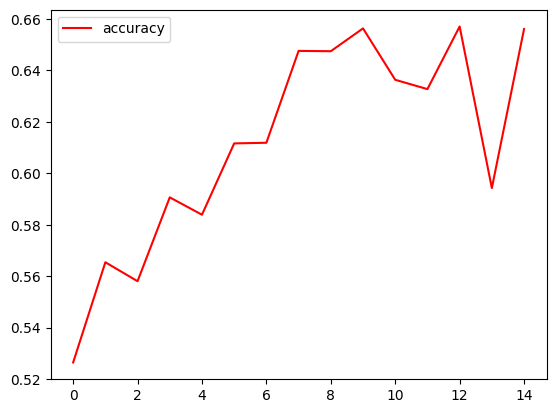

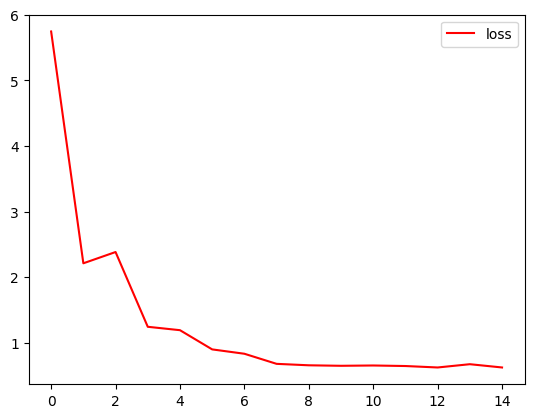

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='accuracy')
plt.legend()

plt.show()

plt.plot(history.history['loss'],color='red',label='loss')
plt.legend()
plt.show()

In [ ]:
# Load and preprocess a single image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = str(input("Enter the path of image: "))  # Replace with the actual path to the image you want to classify

img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.  # Normalize the image

# Get the model's prediction for the image
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")

Enter the path of image: /content/test/cats/cat.4004.jpg
1/1 [==============================] - 0s 72ms/step
It's a Cat!
